<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_p_6_Notebook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluate test dataset

#  Load & Prepare Test Data

In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle


In [ ]:
import pandas as pd

# Load test data
df_test  = pd.read_csv('/content/df5.csv')

In [ ]:
df_test

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,5,5263.0,1,1,1,1270.0,0,True,False,False,False,False,True,False,False,False,False,False,True
1,2,5,6064.0,1,1,1,570.0,1,True,False,False,False,False,False,False,False,False,True,False,False
2,3,5,8314.0,1,1,1,14130.0,1,True,False,False,False,False,False,False,False,False,True,False,False
3,4,5,13995.0,1,1,1,620.0,0,True,False,False,False,False,True,False,False,True,False,False,True
4,5,5,4822.0,1,1,1,16135.0,0,True,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0.0,0,0,1,1900.0,1,False,True,False,False,False,False,False,False,False,True,False,False
1017205,1112,2,0.0,0,0,1,1880.0,0,False,True,False,False,False,True,False,False,True,False,False,True
1017206,1113,2,0.0,0,0,1,9260.0,0,False,True,False,False,False,False,False,False,True,False,False,True
1017207,1114,2,0.0,0,0,1,870.0,0,False,True,False,False,False,False,False,False,True,False,False,True


In [ ]:
store_id = 1
store_df = df_test[df_test["Store"] == store_id].copy()


In [ ]:
filled_sales = store_df["Sales"].copy()
filled_sales.replace(0, np.nan, inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(filled_sales.dropna().values.reshape(-1, 1))


MinMaxScaler(feature_range=(-1, 1))

In [ ]:
model = tf.keras.models.load_model("/content/lstm_sales_model.h5")

In [ ]:
scaled_all = []

for i in range(len(filled_sales)):
    if pd.isna(filled_sales.iloc[i]):
        prev_vals = filled_sales.iloc[i-3:i]
        if prev_vals.isna().any():
            scaled_all.append(np.nan)
            continue
        last_3_scaled = scaler.transform(prev_vals.values.reshape(-1, 1)).reshape(1, 3, 1)
        pred_scaled = model.predict(last_3_scaled)[0][0]
        pred = scaler.inverse_transform([[pred_scaled]])[0][0]
        filled_sales.iloc[i] = pred
        scaled_all.append(pred_scaled)
    else:
        scaled_val = scaler.transform([[filled_sales.iloc[i]]])[0][0]
        scaled_all.append(scaled_val)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

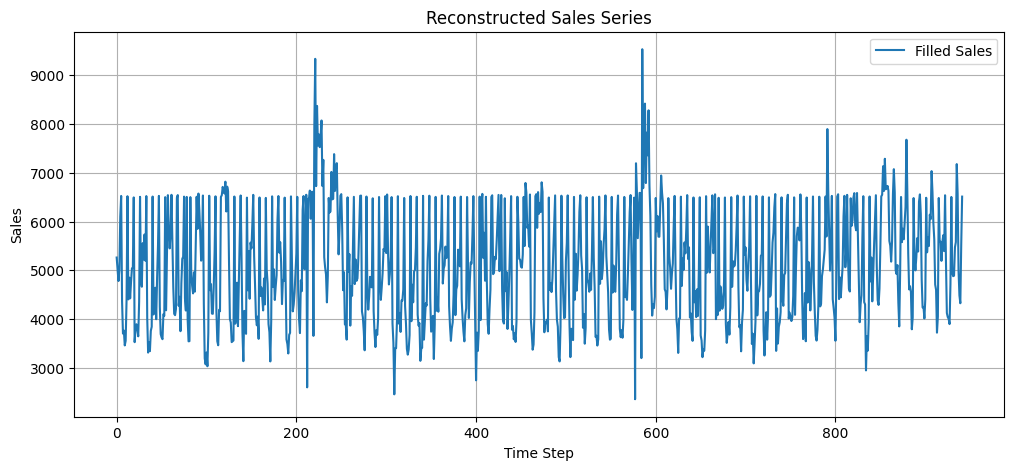

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(filled_sales.values, label="Filled Sales")
plt.title("Reconstructed Sales Series")
plt.xlabel("Time Step")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()


# Fill the missing sales with predictions

In [ ]:
# Inverse transform scaled predictions to original sales scale
reconstructed_sales = []

for i, val in enumerate(scaled_all):
    if np.isnan(val):
        reconstructed_sales.append(np.nan)
    else:
        reconstructed_sales.append(scaler.inverse_transform(np.array(val).reshape(1, 1))[0][0])

# Step 2: Fill missing values in original series
store_df["Reconstructed_Sales"] = filled_sales.copy()
store_df["Reconstructed_Sales"].fillna(pd.Series(reconstructed_sales), inplace=True)


/tmp/ipython-input-22-1272481385.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["Reconstructed_Sales"].fillna(pd.Series(reconstructed_sales), inplace=True)


# Evaluate only on missing values

In [ ]:
# Get mask for originally missing sales
missing_mask = filled_sales.isna()

# Predictions for those indices
predicted_missing = np.array(reconstructed_sales)[missing_mask]

#  Plot: Original vs Reconstructed

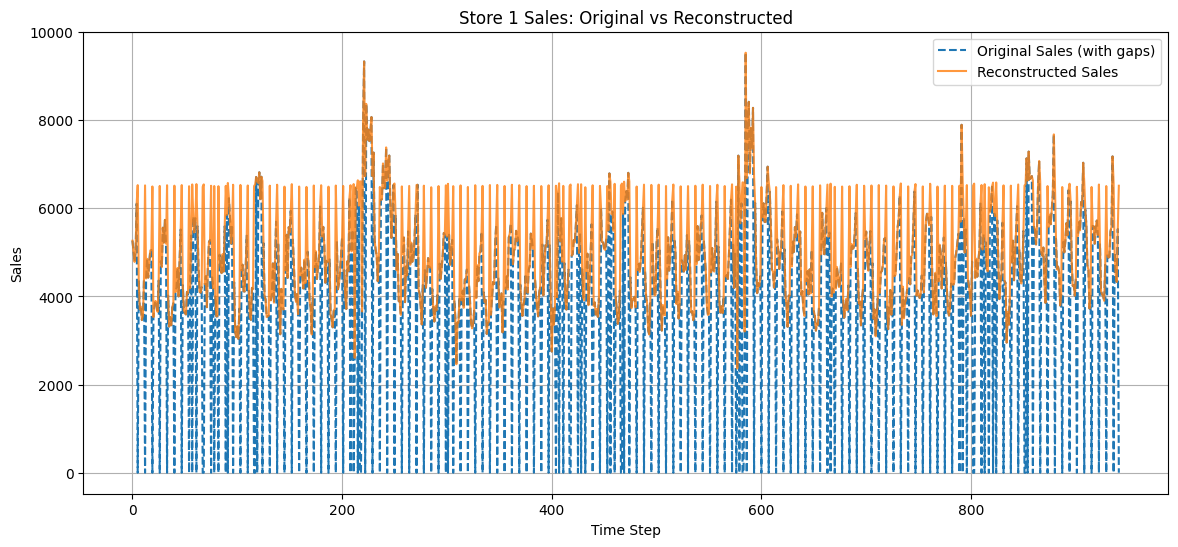

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(store_df["Sales"].values, label="Original Sales (with gaps)", linestyle='--')
plt.plot(store_df["Reconstructed_Sales"].values, label="Reconstructed Sales", alpha=0.8)
plt.title("Store 1 Sales: Original vs Reconstructed")
plt.xlabel("Time Step")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()


# Evaluate using actual vs predicted

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Convert to NumPy arrays
actual = store_df["Sales"].values
predicted = store_df["Reconstructed_Sales"].values

# Mask to include only rows where original sales are not NaN
valid_mask = ~np.isnan(actual) & ~np.isnan(predicted)

# Filter both arrays
actual_valid = actual[valid_mask]
predicted_valid = predicted[valid_mask]

# Compute Metrics
rmse = np.sqrt(mean_squared_error(actual_valid, predicted_valid))
mae = mean_absolute_error(actual_valid, predicted_valid)
r2 = r2_score(actual_valid, predicted_valid)

print("📊 Evaluation Metrics (on valid data points):")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R²: {r2:.4f}")


📊 Evaluation Metrics (on valid data points):
✅ RMSE: 2701.23
✅ MAE: 1116.70
✅ R²: -0.7983


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import joblib

# 1. Load the sample data (no 'Date' column expected)
df = pd.read_csv("/content/sample data.csv")

# 2. Load the scaler
scaler = joblib.load("/content/scaler.pkl")

# 3. (Optional) Ensure input columns match expected features
expected_features = getattr(scaler, 'feature_names_in_', None)
if expected_features is not None:
    missing = [col for col in expected_features if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")
    df = df[expected_features]  # Ensure correct order

# 4. Scale the input features
X_scaled = scaler.transform(df)

# 5. Reshape for LSTM input: (samples, timesteps=1, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 6. Load the trained LSTM model
model = tf.keras.models.load_model("/content/lstm_sales_model.h5")

# 7. Make predictions
predictions = model.predict(X_scaled)

# 8. Attach predictions to the original DataFrame
df['Predicted_Sales'] = predictions.flatten()

# 9. Show predictions
print(df[['Predicted_Sales']])

# 10. Optionally save to CSV
df.to_csv("/content/predicted_sales.csv", index=False)


1284/1284 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
       Predicted_Sales
0              0.08693
1              0.08693
2              0.08693
3              0.08693
4              0.08693
...                ...
41083          0.08693
41084          0.08693
41085          0.08693
41086          0.08693
41087          0.08693

[41088 rows x 1 columns]
